  # Heart attack analysis and prediction dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\aparna kalla\Desktop\heart.csv")

In [5]:
df.shape
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dict={}
for i in list(df.columns):
    dict[i]=df[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
unique count,41,2,4,49,152,2,3,91,2,40,3,5,4,2


In [9]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [10]:
df[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<AxesSubplot:xlabel='caa', ylabel='count'>

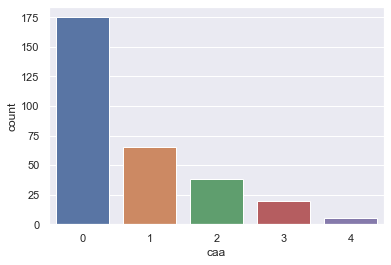

In [66]:
sns.set_theme(style="darkgrid")
sns.countplot(x="caa",data=df)

C:\Users\aparna kalla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


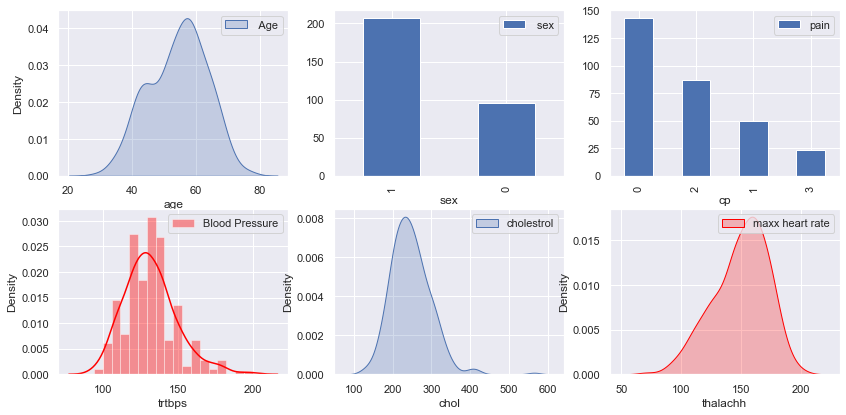

In [37]:
fig=plt.figure(figsize=(14, 14))
fig = plt.subplot(431)
sns.kdeplot(df['age'],shade=True,label=' Age')

plt.legend()
fig = plt.subplot(432)
df['sex'].value_counts().plot(kind='bar',label=' sex')
plt.xlabel('sex')

plt.legend()
fig = plt.subplot(433)
df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')

plt.legend()
fig = plt.subplot(434)
#sns.kdeplot(df['trtbps'],shade=True,label='blood pressure')
sns.distplot(df['trtbps'], color="red",  kde= True,label='Blood Pressure')

plt.legend()
fig = plt.subplot(435)
sns.kdeplot(df['chol'],shade=True,label='cholestrol')

plt.legend()
fig=plt.subplot(436)
sns.kdeplot(df['thalachh'],shade=True,label='maxx heart rate',color='red')

plt.legend()
plt.show()

heart attacks are most common among the age group 45-60
males suffere more than females 


C:\Users\aparna kalla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aparna kalla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aparna kalla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

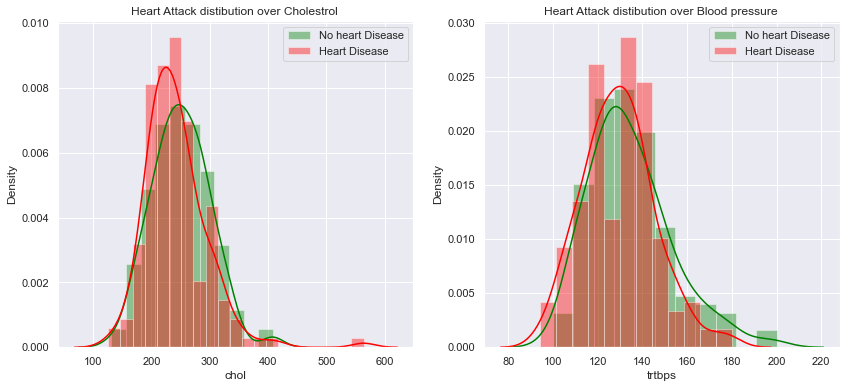

In [44]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(df[df['output'] == 0]["chol"], color='green',label='No heart Disease') 
sns.distplot(df[df['output'] == 1]["chol"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Cholestrol ')
plt.legend()
# plt.show()
fig = plt.subplot(122)
sns.distplot(df[df['output'] == 0]["trtbps"], color='green',label='No heart Disease') 
sns.distplot(df[df['output'] == 1]["trtbps"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Blood pressure ')
plt.legend()

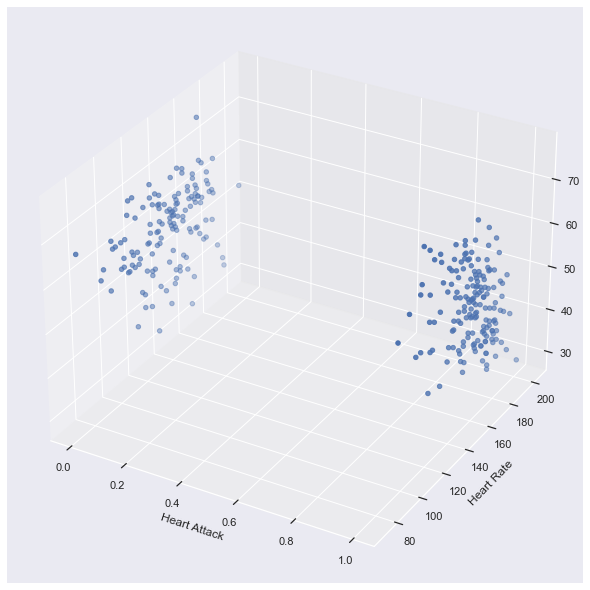

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(df["output"], df["thalachh"],df["age"])
plt.xlabel('Heart Attack')
plt.ylabel('Heart Rate')
plt.show()

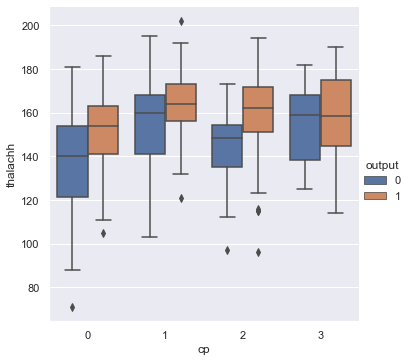

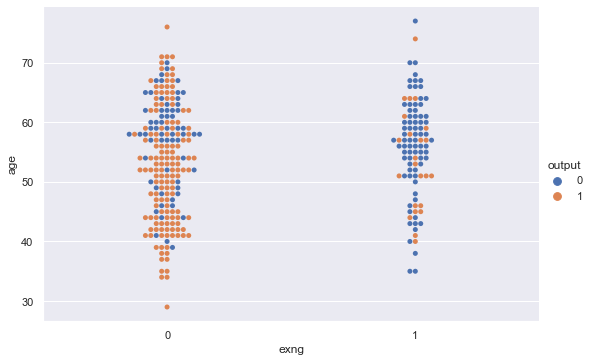

In [50]:
sns.catplot(x="cp", y="thalachh",hue='output' ,kind="box", data=df)
sns.catplot(data=df, x="exng", y="age", hue='output',aspect=1.5,kind="swarm")

<AxesSubplot:>

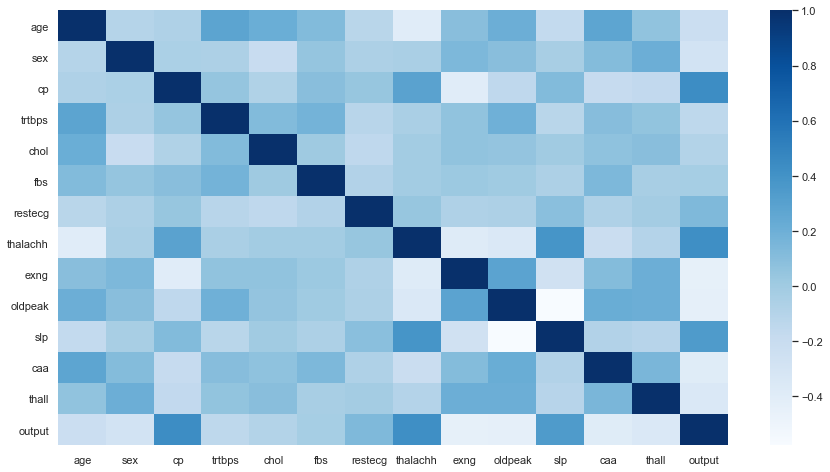

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="Blues")

In [53]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [56]:
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
#import torch
#import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [59]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [60]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [61]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


C:\Users\aparna kalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [67]:
# rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393


<ipython-input-67-ea46c2747c8c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
